# Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд" data-toc-modified-id="Первый-взгляд-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-концентрации-металлов" data-toc-modified-id="Оценка-концентрации-металлов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оценка концентрации металлов</a></span></li><li><span><a href="#Сравнение-размера-гранул-сырья-в-разных-выборках" data-toc-modified-id="Сравнение-размера-гранул-сырья-в-разных-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение размера гранул сырья в разных выборках</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Функция-для-рассчёта-метрики-sMAPE" data-toc-modified-id="Функция-для-рассчёта-метрики-sMAPE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Функция для рассчёта метрики sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-лучших-моделей-на-тестовой-выборке" data-toc-modified-id="Проверка-лучших-моделей-на-тестовой-выборке-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка лучших моделей на тестовой выборке</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Первый взгляд 

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
warnings.filterwarnings('ignore')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [4]:
full_data.info()
full_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14279,2017-11-26 15:59:59,6.476724,10.490578,10.350736,43.584880,76.022789,9.594409,1.978373,14.192372,2.629108,...,16.981738,-501.610601,15.029862,-500.271262,10.925815,-498.897797,8.989850,-499.523942,15.994169,-499.725307
13087,2017-10-04 15:59:59,4.468843,12.070772,6.562945,45.437746,69.684760,6.627131,2.907338,10.904360,2.449840,...,13.984409,-500.202445,11.979024,-399.562515,12.908435,-500.693720,11.034275,-500.151919,14.987436,-500.621765
2009,2016-04-30 17:59:59,5.697589,9.161096,11.205417,45.813908,69.008936,11.122525,2.175739,11.694241,3.879780,...,14.988840,-499.744409,13.027877,-499.666090,8.949519,-498.189002,9.093768,-500.151533,15.997918,-497.971113
11048,2017-07-03 20:59:59,6.227835,10.616779,7.861548,42.392939,61.861494,7.450692,2.439688,10.178986,2.654614,...,17.931362,-500.310828,13.054197,-380.339126,17.995794,-499.705707,13.019189,-500.228160,14.985739,-499.873043
11110,2017-07-06 13:59:59,4.083666,9.509495,10.383549,46.884916,66.156364,8.087328,3.237007,8.906751,2.689607,...,22.039342,-499.505964,15.052963,-378.761916,18.029556,-499.692063,12.987683,-499.921293,15.027158,-499.634623


In [5]:
test_data.info()
test_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1405,2016-11-09 06:59:59,221.523315,4.999643,7.72,0.819842,1598.775519,-499.277042,1597.337822,-500.785543,1603.615967,...,16.037829,-500.671866,13.968983,-501.456598,16.782327,-499.366828,14.001735,-499.634819,21.985514,-499.040233
1765,2016-11-24 15:59:59,186.621709,5.967895,7.02,1.898964,1602.469490,-500.482206,1601.569363,-500.045603,1600.620382,...,18.008413,-499.679304,15.935715,-500.144835,17.533833,-499.916311,11.981683,-499.915389,22.010074,-499.742516
4430,2017-11-23 08:59:59,232.262770,12.032368,7.38,2.285546,1652.497400,-500.679615,1653.368774,-501.768535,1653.395582,...,16.987566,-496.949937,15.105601,-499.248868,10.967524,-498.367979,8.985130,-499.539649,15.994454,-499.259880
4547,2017-11-28 05:59:59,232.549874,12.010009,9.63,1.403445,1601.263126,-495.862507,1598.272486,-511.299178,1600.130631,...,17.012365,-499.923983,15.003986,-500.150221,11.090965,-498.860562,8.999980,-500.013345,15.987182,-497.468121
719,2016-10-10 23:59:59,204.206929,11.012963,7.57,0.997330,1500.204629,-501.694243,1500.444095,-499.230033,1499.635138,...,11.982767,-501.586092,12.001037,-501.697556,9.999177,-506.255092,6.959882,-500.647234,17.030784,-504.222696


In [6]:
train_data.info()
train_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1567,2016-03-27 00:00:00,5.409051,9.663175,4.952813,45.917377,64.634046,10.348958,1.191962,17.271394,2.672293,...,11.998790,-500.616752,11.979479,-499.795556,11.894548,-500.381577,10.048451,-499.571982,19.991917,-499.482405
4233,2016-08-12 14:59:59,4.386377,9.312525,10.765171,46.859571,65.030441,11.329349,3.443720,11.457802,4.571810,...,20.005163,-401.066656,10.067472,-400.420215,8.522052,-406.777898,4.995831,-400.316023,23.003415,-501.499384
8270,2017-06-27 06:59:59,3.763080,11.450415,9.706376,45.428377,65.741356,7.841007,2.644968,10.359535,2.384850,...,18.050473,-500.665703,12.988711,-384.416043,17.981511,-499.957381,13.020730,-500.270119,14.976578,-499.267165
2562,2016-05-26 14:59:59,4.438060,11.560180,8.124366,43.351628,59.698325,7.753796,2.345011,11.510795,2.889587,...,10.068126,-500.472171,8.115232,-499.896660,7.991648,-500.854400,6.010006,-499.961590,17.985727,-501.119344
7093,2017-04-25 11:59:59,4.350684,11.539729,10.138898,44.581476,67.458414,7.934731,2.755725,11.318149,2.635918,...,24.999431,-398.749730,22.983787,-398.733894,25.995962,-450.052763,24.010015,-450.086510,30.010300,-499.764880


In [7]:
missing_columns = list(train_data.columns.difference(test_data.columns))
missing_columns

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### Вывод 

Исходные данные представляют собой три таблицы, две из которых(`train_data` и `test_data`) являются выборками из третьей (`full_data`). При этом, в таблицах `train_data` и `full_data` по 87 столбцов, а в таблице `test_data` - всего 53. Чтобы оценить различия, недостающие 34 столбца были выведены отдельным списком. Можно сделать вывод, что все эти недостающие столбцы хранят в себе данные, которые вычисляются сильно позже, уже по завершению техпроцесса. Таким образом, в таблице `test_data` находятся только те данные, которые мы можем получить в реальном времени, поэтому имеет смысл обучать модель именно на этих признаках.  
Также стоит отметить, что в большинстве столбцов есть пропуски, но их везде довольно мало. Типы данных везде указаны корректно, за исключением столбца с датой и временем.

## Подготовка данных

### Предобработка 

In [8]:
data_names = ['full_data', 'train_data', 'test_data']

for name in data_names:
    nan = locals()[name].isna().sum().sum()
    locals()[name].dropna(inplace=True)
    locals()[name]['date'] = pd.to_datetime(locals()[name]['date'], format='%Y-%m-%dT%H:%M:%S')
    print('Таблица', name, 
          '\nБыло пропусков {}, стало {}'.format(nan, locals()[name].isna().sum().sum()), 
          '\nТип данных столбца date:', locals()[name]['date'].dtypes, '\n')

Таблица full_data 
Было пропусков 4481, стало 0 
Тип данных столбца date: datetime64[ns] 

Таблица train_data 
Было пропусков 4100, стало 0 
Тип данных столбца date: datetime64[ns] 

Таблица test_data 
Было пропусков 90, стало 0 
Тип данных столбца date: datetime64[ns] 



Не смотря на то, что в условии задачи сказано, что близкие по времени значения очень похожи, наилучшие результаты от модели удалось получить именно при удалении пропущенных значений. Возможно, слишком часто встречается несколько пропусков подряд, и заполнение соседним значением становится некорректно. Или, возможно, много строк, в которых большое количество пропущенных значений.  
Помимо удаления строк с пропусками был изменён тип столбца `date` на datetime64.

### Проверка эффективности обогащения 

In [9]:
F = train_data['rougher.input.feed_au']
C = train_data['rougher.output.concentrate_au']
T = train_data['rougher.output.tail_au']

In [10]:
rougher_output_recovery = ((C * (F - T)) / (F * (C - T))) * 100
mae = mean_absolute_error(rougher_output_recovery, train_data['rougher.output.recovery'])
mae

9.739730529255835e-15

Чтобы убедиться в корректности исходных данных, мы вручную посчитали значение одного из целевых признаков, и измерили среднее абсолютное отклонение. Полученное значение оказалось в достаточной степени маленьким, чтобы можно было утверждать о правильности исходных данных.

### Вывод 

В результате предобработки мы решили вопрос с пропусками (радикально, но эффективно), а также установили корректные типы данных. Заодно проверили один из целевых признаков по формуле, предоставленной заказчиком - оказалось, что данные были посчитаны правильно.

## Анализ данных 

### Оценка концентрации металлов 

Основная цель при восстановлении золота из золотосодержащей руды - получение золота, и эфективность зависит от количества полученного продукта. Сложность в том, что золотосодержащая руда содержит в себе не только золото, а, например, ряд других металлов, таких как серебро или свинец. Попробуем оценить эффективность всего цикла восстановления, построив графики изменения концентрации веществ на каждом из этапов:

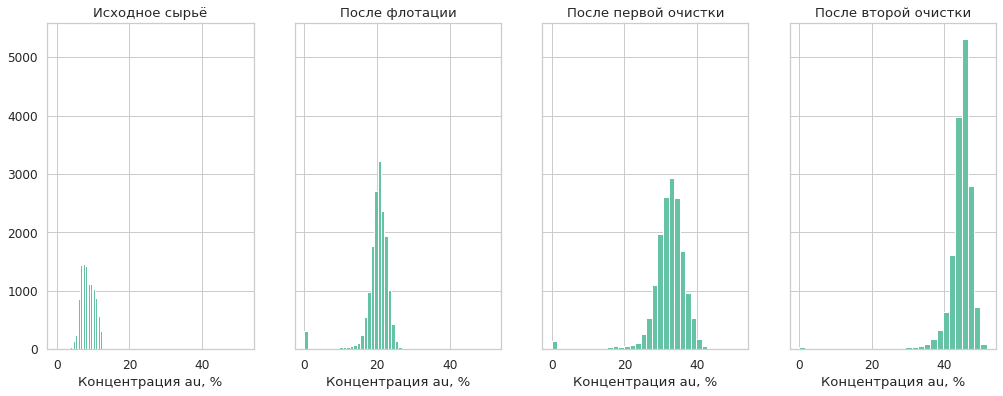

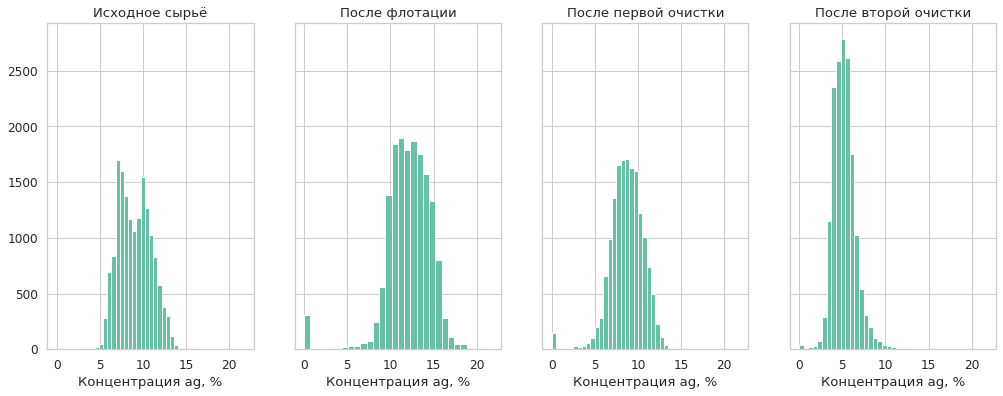

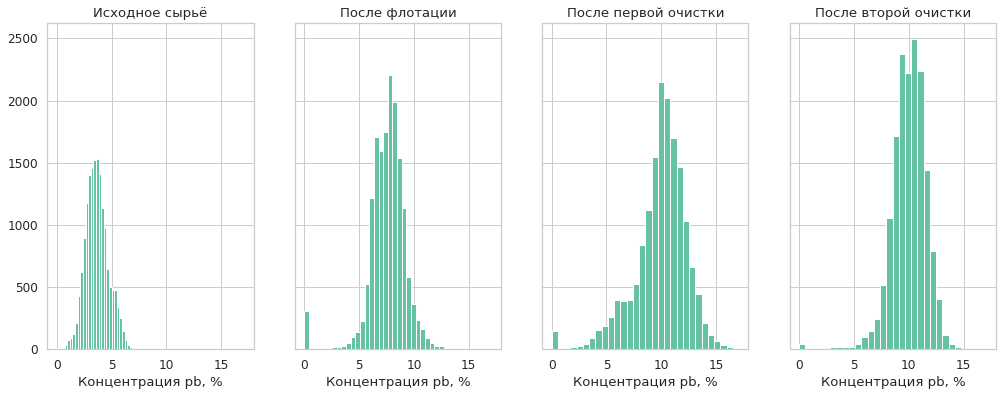

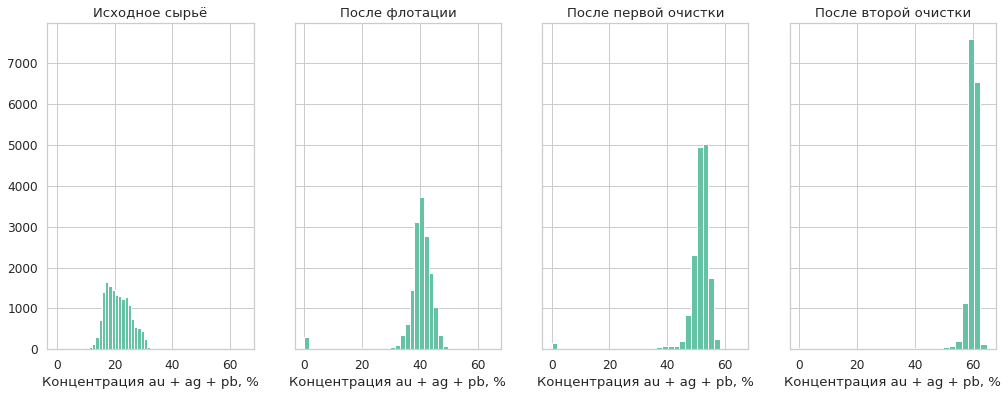

In [11]:
metals = ['au', 'ag', 'pb', 'au + ag + pb']
features = ['rougher.input.feed_', 'rougher.output.concentrate_', 
            'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
titles = ['Исходное сырьё', 'После флотации', 'После первой очистки', 'После второй очистки']

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

for metal in metals:  
    display(HTML("<font size=3><p><br><br><b>Изменение концентрации {}:</b></p>".format(metal)))
    fig, ax = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(17, 6))
    
    for i in range(4):
        ax[i].title.set_text(titles[i])
        ax[i].set_xlabel('Концентрация {}, %'.format(metal))
        
        if metal == 'au + ag + pb':
            concetrate_sum = 0
            for y in range(3):
                concetrate_sum += full_data[features[i]+metals[y]]
            ax[i].hist(concetrate_sum, bins=30)
            
        else:
            ax[i].hist(full_data[features[i]+metal], bins=30)           
        
    plt.show()

- Концентрация золота, как и ожидалось, очень сильно растёт к концу процесса. Примечательно, что разница в концентрации до первой очистки и после неё незначительная, в то время как после второй очистки концентрация золота кратно увеличивается.  
- Концентрация серебра изменяется обратно пропорционально золоту. При этом, опять же, после первой очистки изменения не большие, а после второй концентрация серебра сильно уменьшается.  
- Зато свинец чувствует себя совершенно замечательно на нашем производстве - его концентарция растёт вместе с золотом, хоть и слабо. Возможно, это связано с особенностями техпроцесса и свойствами самих металлов - между ними может быть больше общего, чем кажется на первый взгляд.  
- Суммарная концентрация всех металлов стабильно растёт, что вполне ожидаемо, учитывая сильный рост золота и, хоть и слабый, но всё же рост свинца. Исходя из графиков можно сделать предположение, что, в среднем, финальный продукт состоит на 60% из трёх исследованных металлов, где около 45% золота, 10% свинца и 5% серебра. 

Отдельного внимания заслуживают аномальные значения около 0% - это либо выбросы, либо ошибка оборудования. Свинец и серебро нас не особо интересуют, а вот погрешности в концентрации золота могут быть критичны для модели. Попробуем оценить, какая доля от всего объёма данных попадает под эту категорию:

In [12]:
for i in range(2):
    df = locals()[data_names[i]]
    display(HTML("<p><br><b>Выбросы в таблице {}:<br></b></p>".format(data_names[i])))
    print(
    'rougher.output.concentrate_au: {: >14.2%}'.format(
        len(df[df['rougher.output.concentrate_au'] < 5]) / len(df['rougher.output.concentrate_au'])), 
    '\nprimary_cleaner.output.concentrate_au: {: >6.2%}'.format(
        len(df[df['primary_cleaner.output.concentrate_au'] < 10]) / len(df['primary_cleaner.output.concentrate_au'])), 
    '\nfinal.output.concentrate_au: {: >16.2%}'.format(
        len(df[df['final.output.concentrate_au'] < 20]) / len(df['final.output.concentrate_au'])))


rougher.output.concentrate_au:          1.93% 
primary_cleaner.output.concentrate_au:  1.24% 
final.output.concentrate_au:            0.57%


rougher.output.concentrate_au:          1.94% 
primary_cleaner.output.concentrate_au:  1.35% 
final.output.concentrate_au:            0.59%


Судя по всему, выбросов у нас довольно мало. Их отсутствие хуже не сделает, в то время как их наличие запросто может испортить нам обучение модели, так что удаляем:

In [13]:
for i in range(2):
    df = locals()[data_names[i]]
    df = df[(df['rougher.output.concentrate_au'] >  5) & 
            (df['primary_cleaner.output.concentrate_au'] > 10) & 
            (df['final.output.concentrate_au'] > 20)]
    locals()[data_names[i]] = df

### Сравнение размера гранул сырья в разных выборках 

По условию задачи, нам нужно учитывать не только концентрацию золота, но и размер гранул сырья. Чтобы модель умела грамотно предсказывать значения на разных исходных данных, нам нужно убедиться, что распределения размера гранул в тестовой и обучающей выборке либо совпадают, либо незначительно отличаются. Для этого построим соответствующие графики и посчитаем разницу средних, для гранул до флотации и после:

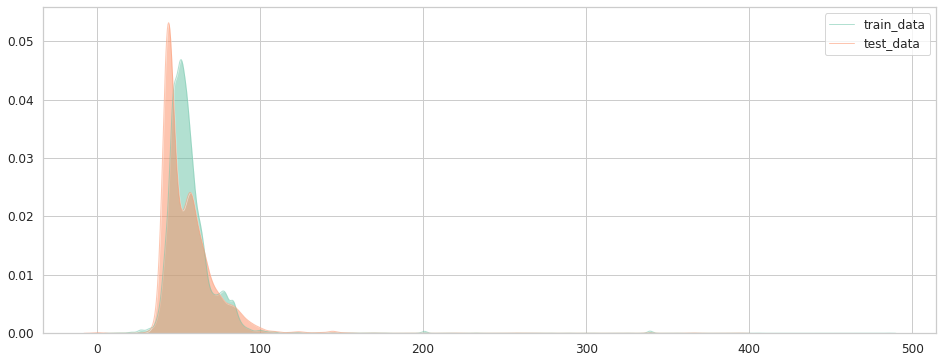

Средний размер гранул сырья в выборках отличается на 2.40%.



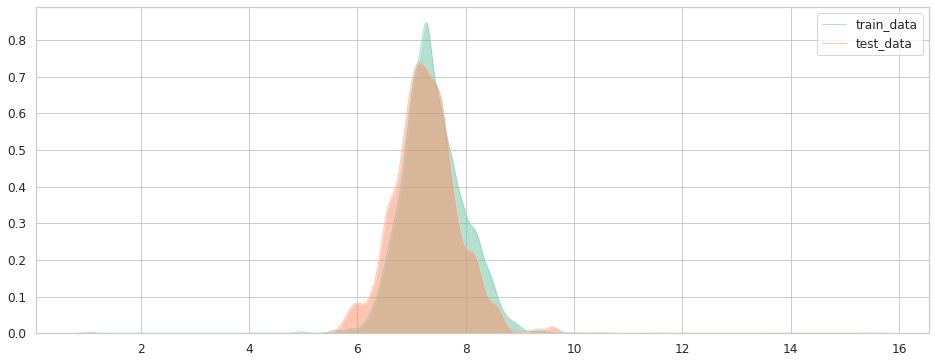

Средний размер гранул сырья в выборках отличается на 1.78%.



In [14]:
columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']
process = ['до флотации', 'после флотации']

for i in range(2):
    display(HTML("<font size=3><p><br><br><b>Размер гранул сырья {}:</b></p>".format(process[i])))
    fig, ax = plt.subplots(figsize=(16, 6))
    means = []
    for y in range(2):
        ax = sns.kdeplot(locals()[data_names[y+1]][columns[i]], 
                         shade=True, 
                         gridsize=700,
                         alpha=.5, 
                         linewidth=1, 
                         label=data_names[y+1])
        means.append(locals()[data_names[y+1]][columns[i]].mean())
        ax.legend()
    plt.show()
    print('Средний размер гранул сырья в выборках отличается на {:.2%}.\n'.format(abs((means[0] - means[1]) / means[0])))  

### Вывод 

Как можно заметить, распределения отличаются, но очень незначительно. Различия между средними значениями составляют 2.4% до флотации и 1.78% после. Скорее всего это не критично, но лучше уточнить этот момент у заказчика, или у кого-то, кто более тесно знаком с этим техпроцессом. Мы же посчитаем эту разницу несущественной, и перейдём к обучению моделей.

## Обучение моделей 

### Подготовка выборок 

Прежде чем начать обучать модели, нам сперва требуется подготовить соответсвующие выборки. Целевых признака у нас два - `rougher.output.recovery` и `final.output.recovery`, значит нам нужно обучать два разных комплекта моделей, и для каждого из них нужны разные выборки. Начнём с того, что подготовим `test_data` и `train_data`:

In [15]:
test_data = test_data.merge(full_data[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                            how = 'left', on = 'date')
test_data.dropna(inplace=True)
train_data = train_data[test_data.columns]

В переменную `test_data` мы добавили целевые признаки, взяв недостающие значения из таблицы `full_data`. Найти нужные строки нам помог столбец с датой и временем, значения которого по условию не повторяются, однако в результате соединения в целевых признаках образовалось несколько пропусков, которые мы безжалостно удалили.  
Как мы поминим, в таблице `test_data` находятся только те признаки, значения которых можно получить в реальном времени, в то время как в остальных таблицах есть значения, вычисляемые позже. Так как предсказывать мы будем на основе данных из таблицы `test_data`, то и обучать модель будет логично на том же комплекте признаков, так что в `train_data` мы оставили только нужные столбцы.

In [16]:
rougher_columns = list(test_data.loc[:, test_data.columns.str.contains('rougher')].columns)

train_r = train_data[rougher_columns]
test_r = test_data[rougher_columns]
train_f = train_data.drop('date', axis=1)
test_f = test_data.drop('date', axis=1)

Наши целевые признаки в реальных условиях рассчитываются в разных местах техпроцесса. Так, например, `rougher.output.recovery` вычисляется только на основе данных в процессе/до/после флотации, в то время как `final.output.recovery` отображает концентрацию в самом конце процесса восстановления. Исходя из этого, мы создали 4 переменных: `train_r`, `test_r`, `train_f` и `test_f`. В первых двух находятся версии таблиц `train_data` и `test_data`c признаками, в названии которых есть слово "rougher", то есть все признаки, имеющие отношение к этапу флотации. Во вторых двух переменных меньше изменений - там мы отказались только от столбца с датой, сохранив все остальные признаки.

In [17]:
X_train_r = train_r.drop('rougher.output.recovery', axis=1)
X_test_r = test_r.drop('rougher.output.recovery', axis=1)
y_train_r = train_r['rougher.output.recovery']
y_test_r = test_r['rougher.output.recovery']

X_train_f = train_f.drop('final.output.recovery', axis=1)
X_test_f = test_f.drop('final.output.recovery', axis=1)
y_train_f = train_f['final.output.recovery']
y_test_f = test_f['final.output.recovery']

Каждый набор данных мы поделили ещё на две выборки: в одной целевые признаки, в другой все остальные. В результате получили 8 переменных, которые будут в дальнейшем использоваться для обучения моделей.

In [18]:
sample_names = ['X_train_r', 'X_test_r', 'y_train_r', 'y_test_r', 
                'X_train_f', 'X_test_f', 'y_train_f', 'y_test_f']

scaler = StandardScaler()

print('Размеры выборок:\n')
for name in sample_names:
    if 'X' in name:
        columns = locals()[name].columns
        locals()[name][columns] = scaler.fit_transform(locals()[name][columns])
    print('Выборка {}:'.format(name), locals()[name].shape)

Размеры выборок:

Выборка X_train_r: (10603, 22)
Выборка X_test_r: (4906, 22)
Выборка y_train_r: (10603,)
Выборка y_test_r: (4906,)
Выборка X_train_f: (10603, 53)
Выборка X_test_f: (4906, 53)
Выборка y_train_f: (10603,)
Выборка y_test_f: (4906,)


Для проверки выводим итоговые размеры всех получившихся выборок, чтобы убедиться, что всё поделено верно. Параллельно с этим проводим масштабирование, поскольку разница между объектами в разных признаках была слишком большой. 

### Функция для рассчёта метрики sMAPE

По условию задачи, оценивать качество моделей нам необходимо с помощью метрики sMAPE. Для дальнейшего удобства и уменьшения вероятности ошибки упакуем формулы рассчёта базовой и итоговой метрики в две формулы - `smape` и `total_smape` соответственно:

$$\mathit{sMAPE} = \frac{1}{N} \sum_{i=1}^{N} \frac{\left| y_i - \hat{y}_i \right|}{\left( \left| y_i \right| + \left|\hat{y}_i \right| \right) / 2} \times 100\%$$

In [38]:
def smape(target, predict):   
    return 1 / len(target) * sum( abs(target - predict) / ( (abs(target) + abs(predict)) * 0.5) ) * 100

$$\mathit{Total\ sMAPE} = 25\% \times \mathit{sMAPE}\left( \mathit{rougher} \right) + 75\% \times \mathit{sMAPE} \left( \mathit{final} \right)$$

In [20]:
def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Обучение моделей 

Для этой задачи мы используем три разных модели: CatBoost, DecisionTree и LinearRegressor. Поскольку ключевой метрикой для нас является total sMAPE, объединяющая в себе отклонения в обоих предсказаниях, мы будем не только обучать разные модели для каждого признака, но и проверять их сочетания. В конечном счёте, комбинация, которая позволит получить наименьшее значение отклонения, и станет победителем:

In [39]:
models = [CatBoostRegressor(iterations=23, depth=10, learning_rate=0.15, random_state=123, silent=True),
          DecisionTreeRegressor(max_depth=1, random_state = 123), 
          LinearRegression()]

best_score = 100
best_models = 0

for model_r in models:
    for model_f in models:
        
        smape_rougher = cross_val_score(model_r, 
                                        X_train_r, 
                                        y_train_r, 
                                        scoring = make_scorer(smape), 
                                        n_jobs = -1).mean()
        smape_final = cross_val_score(model_f, 
                                      X_train_f, 
                                      y_train_f, 
                                      scoring = make_scorer(smape), 
                                      n_jobs = -1).mean()
        smape_total = total_smape(smape_rougher, smape_final)
        
        if smape_total < best_score:
            best_score = smape_total
            best_models = (model_r.__class__.__name__, model_f.__class__.__name__)  

print('Лучшее значение total sMAPE: {:.2f}% у моделей {}'.format(best_score, best_models))          

Лучшее значение total sMAPE: 7.53% у моделей ('CatBoostRegressor', 'CatBoostRegressor')


На обучающей выборке наименьшее значение sMAPE, которое удалось получить, составляет 7.53%. Достичь его удалось при использовании модели CatBoost для обоих предсказаний.

### Проверка лучших моделей на тестовой выборке 

Теперь, когда мы знаем, какие модели лучше всего себя показывают на обучающей выборке, мы можем проверить их на тестовой:

In [22]:
model_r = CatBoostRegressor(iterations=23, depth=10, learning_rate=0.15, random_state=123, silent=True)
model_r.fit(X_train_r, y_train_r)
predictions_r = model_r.predict(X_test_r)
smape_rougher = smape(y_test_r, predictions_r)                                       

model_f = CatBoostRegressor(iterations=23, depth=10, learning_rate=0.15, random_state=123, silent=True)
model_f.fit(X_train_f, y_train_f)
predictions_f = model_f.predict(X_test_f)
smape_final = smape(y_test_f, predictions_f)                                       

smape_total = total_smape(smape_rougher, smape_final)
    
print('Total sMAPE на тестовой выборке:{:.2f}%'.format(smape_total))

Total sMAPE на тестовой выборке:6.36%


В результате мы получаем значение симметричного среднего абсолютного процентного отклонения 6.36%, что, в целом, выглядит довольно неплохо.

### Константная модель

Чтобы убедиться, что мы весь этот путь проделали не зря, сравним наши значения с аналогичными, но полученными от константной модели - она стабильно предсказывает средние значения:

In [23]:
dummy_pred_r = np.array([y_train_r.mean() for i in range(len(y_train_r))])
dummy_pred_f = np.array([y_train_f.mean() for i in range(len(y_train_f))])

dummy_smape_r = smape(y_train_r, dummy_pred_r)
dummy_smape_f = smape(y_train_f, dummy_pred_f)
dummy_total = total_smape(dummy_smape_r, dummy_smape_f)
print('Total sMAPE константной модели:{:.2f}%'.format(dummy_total))

Total sMAPE константной модели:8.43%


Как можно заметить, хоть отклонение нашей модели и получилось меньше, чем у константной, но разница не так уж и велика. 

### Вывод 

Мы обучили несколько разных моделей, проверили их на кросс-валидации, и обнаружили, что наилучший результат удаётся получить, если использовать для обоих предсказаний модель CatBoost. Такая комбинация дала значение sMAPE 7.53% на валидационной и 6.36% на тестовой выборке. В то же время, константная модель предсказала с отклонением в 8.43%.

## Общий вывод 

Наша задача была создать модель, которая сможет предсказать значение финальной концентрации сырья, чтобы в дальнейшем компания смогла применить её для оптимизации производства. Мы провели анализ и предобработку данных, обучили несколько разных моделей и получили в итоге предсказания по тестовой выборке с отклонением в 6.36%. Само по себе значение 6.36% оценить затруднительно, поскольку нет конкретных инструкций от заказчика на тему необходимой точности предсказаний. Однако, константная модель, которая всегда "предсказывает" одинаковые средние значения, ошибается примерно на 2% больше, чем наша модель. Дальнейшие действия зависят от решения заказчика, поскольку для рассчёта прибыли у нас недостаточно данных.  
Стоит отметить, что анализ изменения концентрации металлов показал достаточно эффективное увеличение концентрации золота по мере прохождения разных этапов производства - в итоговом продукте золото составляет 45-50%, при исходном уровне около 10%. Концентрация серебра по мере очистки уменьшается, а вот свинца, наоборот, увеличивается. В конечном продукте свинец составляет около 10%, и, возможно, на это стоит обратить внимание, учитывая токсичность этого металла. Помимо вышеописанных металлов, конечный продукт где-то на 40% состоит из прочих примесей, что тоже сказывается на эффективности производства. Повторюсь, у нас недостаточно данных для рассчёта прибыли и расходов, но, возможно, стоит посмотреть в сторону усложнения процесса очистки, с целью увеличить концентрацию золота в конечном продкуте. Более подробные рассчёты смогут показать, эффективна ли будет такая оптимизация, и насколько.